In [ ]:
# KMeans Algorithm


In [1]:
# 1 . Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Load the Dataset
df = pd.read_csv('Iris.csv')

In [5]:

# Step 3: Look at top 5 values
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
# Step 4: Select only PetalLengthCm and PetalWidthCm
X = df[['PetalLengthCm', 'PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [13]:
# Step 6: List to store within-cluster sum of squares (WCSS)
wcss = []

In [15]:
# Step 7: Fit the KMeans algorithm with different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

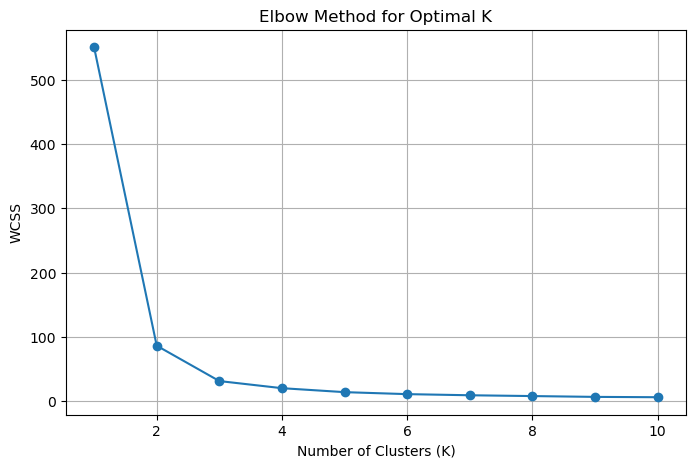

In [17]:
# Step 8: Plot the WCSS values (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [19]:
# Step 9: Fit the KMeans clustering with K=3 (known optimal for Iris)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [21]:
# Step 10: Make predictions (done above as y_kmeans)

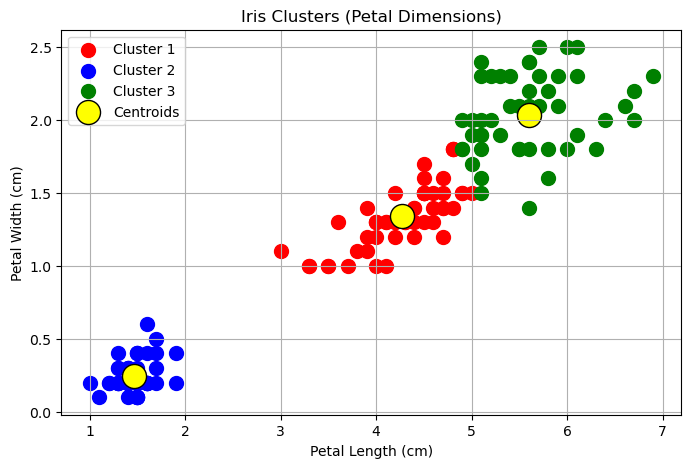

In [23]:
# Step 11: Visualize the clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green']

for i in range(3):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', edgecolor='black')

plt.title('Iris Clusters (Petal Dimensions)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()